/Users/aaryannagpal1/Documents/Thesis/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10904/10904 ━━━━━━━━━━━━━━━━━━━━ 9s 705us/step - accuracy: 0.9593 - loss: 0.1118 - val_accuracy: 0.9652 - val_loss: 0.0869
Epoch 2/50
10904/10904 ━━━━━━━━━━━━━━━━━━━━ 7s 662us/step - accuracy: 0.9671 - loss: 0.0895 - val_accuracy: 0.9700 - val_loss: 0.0767
Epoch 3/50
10904/10904 ━━━━━━━━━━━━━━━━━━━━ 8s 719us/step - accuracy: 0.9683 - loss: 0.0854 - val_accuracy: 0.9704 - val_loss: 0.0748
Epoch 4/50
10904/10904 ━━━━━━━━━━━━━━━━━━━━ 8s 688us/step - accuracy: 0.9688 - loss: 0.0829 - val_accuracy: 0.9689 - val_loss: 0.0743
Epoch 5/50
10904/10904 ━━━━━━━━━━━━━━━━━━━━ 7s 663us/step - accuracy: 0.9689 - loss: 0.0814 - val_accuracy: 0.9717 - val_loss: 0.0721
Epoch 6/50
10904/10904 ━━━━━━━━━━━━━━━━━━━━ 7s 680us/step - accuracy: 0.9694 - loss: 0.0804 - val_accuracy: 0.9692 - val_loss: 0.0718
Epoch 7/50
10904/10904 ━━━━━━━━━━━━━━━━━━━━ 7s 651us/step - accuracy: 0.9692 - loss: 0.0790 - val_accuracy: 0.9710 - val_loss: 0.0694
Epoch 8/50
10904/10904 ━━━━━━━━━━━━━━━━━━━━ 7s 676us/step - ac

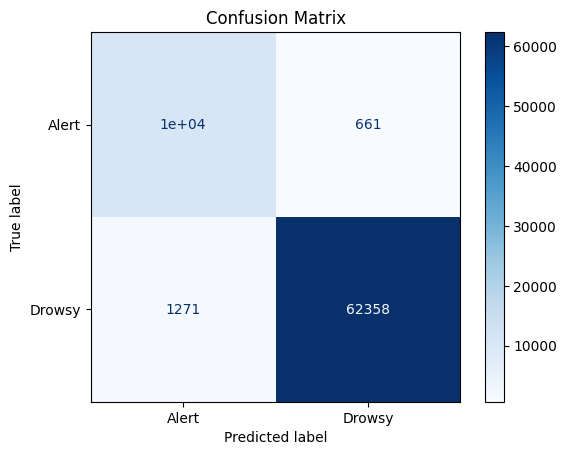

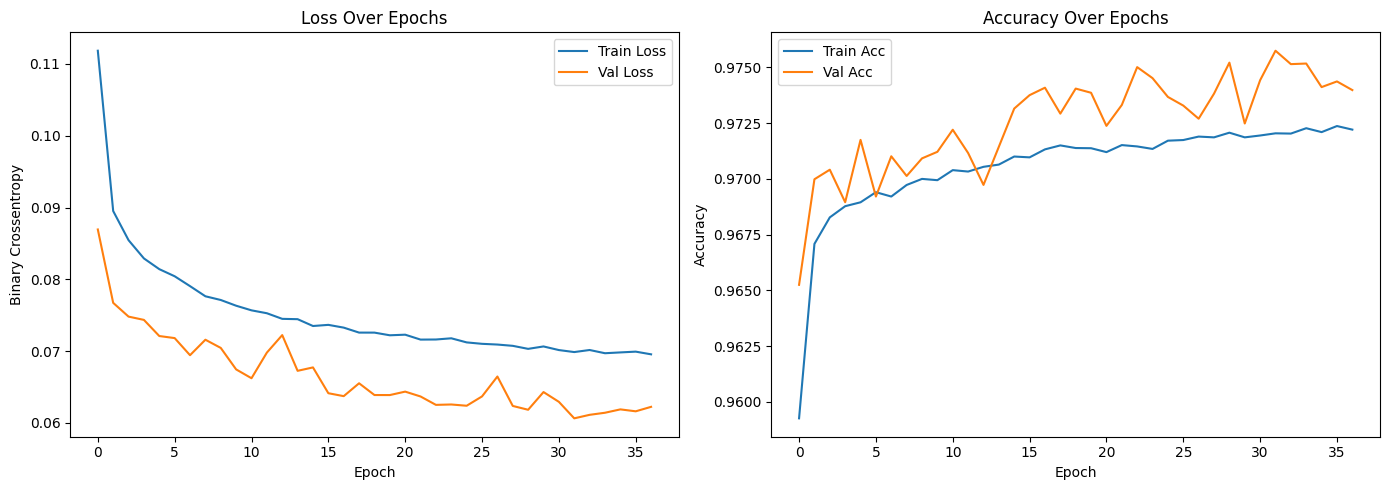

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# -----------------------------
# Load and preprocess data
# -----------------------------
df = pd.read_csv("Raw Data/P8_S1.csv")

# Drop 1back and 2back
df = df[~df['Label'].isin(['1back', '2back'])].dropna(subset=['Label'])

# Binary label
df['binary_label'] = df['Label'].apply(lambda x: 1 if x in ['slightly', 'moderately', 'very'] else 0)

# Predictors and label
features = ['Physio_ECG','Physio_GSR','swAngle','laneDev_OffsetfrmLaneCentre','speed']
X = df[features]
y = df['binary_label'].values

# Scale and reshape
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_cnn = X_scaled.reshape(-1, X.shape[1], 1)

# Train/Val/Test Split
X_temp, X_test, y_temp, y_test = train_test_split(X_cnn, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42)

# -----------------------------
# CNN Model Definition
# -----------------------------
model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_cnn.shape[1], 1)),
    BatchNormalization(),

    Conv1D(64, kernel_size=2, activation='relu'),
    BatchNormalization(),

    # Only one pooling layer
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------
# Train Model
# -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# -----------------------------
# Evaluation and Confusion Matrix
# -----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Alert", "Drowsy"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# -----------------------------
# Training Curves
# -----------------------------
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/50


/Users/aaryannagpal1/Documents/Thesis/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8180 - loss: 0.4662 - val_accuracy: 0.4080 - val_loss: 1.2099
Epoch 2/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8437 - loss: 0.3748 - val_accuracy: 0.8675 - val_loss: 0.3387
Epoch 3/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8539 - loss: 0.3408 - val_accuracy: 0.8757 - val_loss: 0.3163
Epoch 4/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8669 - loss: 0.3257 - val_accuracy: 0.8861 - val_loss: 0.2803
Epoch 5/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8763 - loss: 0.2985 - val_accuracy: 0.8883 - val_loss: 0.2700
Epoch 6/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8823 - loss: 0.2929 - val_accuracy: 0.8891 - val_loss: 0.2707
Epoch 7/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8913 - loss: 0.2713 - val_accuracy: 0.8987 - val_loss: 0.2607
Epoch 8/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8956 - loss: 0.2598 - val_accuracy: 0.8920 - val_

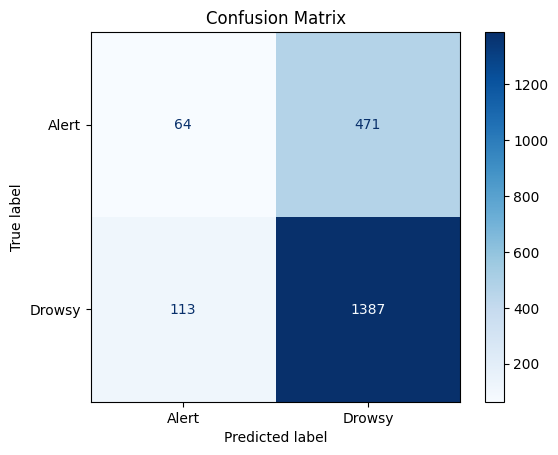

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step

Summary Metrics:

   Metric Dummy
 Accuracy  0.71
  Wgt. F1  0.66
  Bal. F1  0.50
Precision  0.65
   Recall  0.71
      AUC  0.62


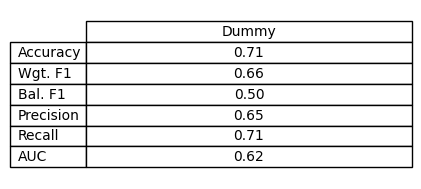

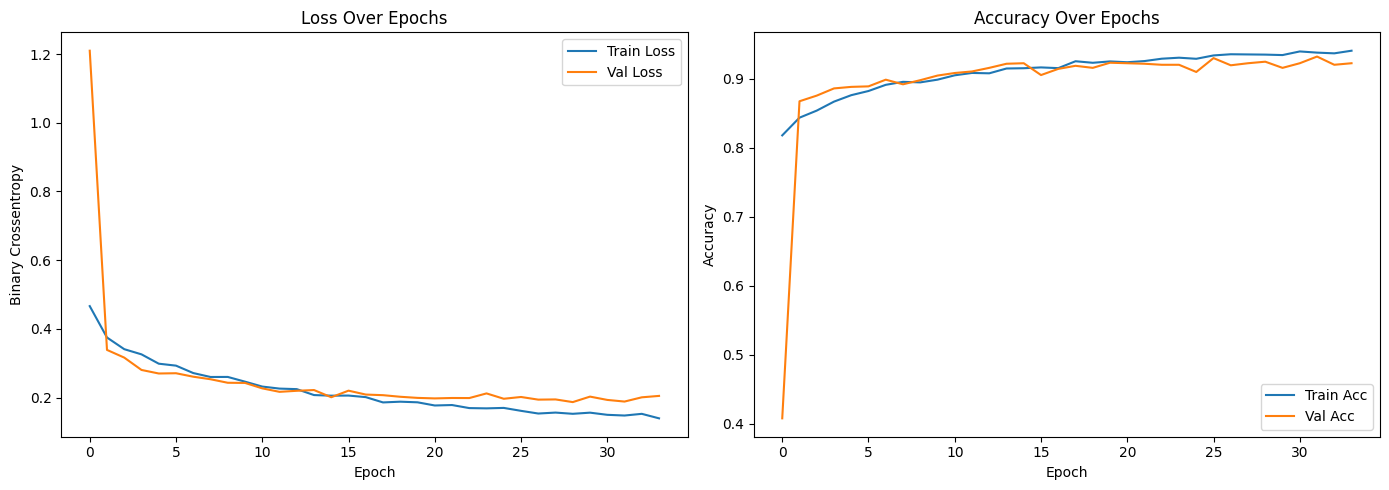

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# -----------------------------
# Load and preprocess data
# -----------------------------
train_path = "Classification_Combined_Data/S1_S2_train_data.csv"
test_path  = "Classification_Combined_Data/S1_S2_test_data.csv"
df = pd.read_csv(train_path)

# Drop 1back and 2back
df = df[~df['Label'].isin(['1back', '2back'])].dropna(subset=['Label'])

# Binary label
df['binary_label'] = df['Label'].apply(lambda x: 1 if x in ['Slight', 'Moderate', 'Very'] else 0)

# Predictors and label
features = ['EAR_mean_mean','MAR_inner_mean','MAR_outer_mean','AU01_r_mean','AU15_r_mean','AU25_r_mean','AU26_r_mean','AU45_r_mean','pose_Tx_mean','pose_Ty_mean','pose_Tz_mean','pose_Rx_mean','pose_Ry_mean','pose_Rz_mean','gaze_angle_x_mean','gaze_angle_y_mean','swAngle_mean','laneDevPosition_mean','laneDev_OffsetfrmLaneCentre_mean','speed_mean','EAR_mean_std','MAR_inner_std','MAR_outer_std','AU01_r_std','AU15_r_std','AU25_r_std','AU26_r_std','AU45_r_std','pose_Tx_std','pose_Ty_std','pose_Tz_std','pose_Rx_std','pose_Ry_std','pose_Rz_std','gaze_angle_x_std','gaze_angle_y_std','swAngle_std','laneDevPosition_std','laneDev_OffsetfrmLaneCentre_std','speed_std']
X = df[features]
y = df['binary_label'].values

# Scale and reshape
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_cnn = X_scaled.reshape(-1, X.shape[1], 1)

df_test = pd.read_csv(test_path)
df_test = df_test[~df_test['Label'].isin(['1back', '2back'])].dropna(subset=['Label'])
df_test['binary_label'] = df_test['Label'].apply(lambda x: 1 if x in ['Slight', 'Moderate', 'Very'] else 0)
X_test_raw = df_test[features]
y_test = df_test['binary_label'].values
X_test_scaled = scaler.transform(X_test_raw)
X_test = X_test_scaled.reshape(-1, X_test_raw.shape[1], 1)

# Train/Val/Test Split
X_train, X_val, y_train, y_val = train_test_split(X_cnn, y, test_size=0.15, stratify=y, random_state=42)
X_test, y_test = X_test, y_test
# X_temp, X_test, y_temp, y_test = train_test_split(X_cnn, y, test_size=0.15, stratify=y, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42)

# -----------------------------
# CNN Model Definition
# -----------------------------
model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_cnn.shape[1], 1)),
    BatchNormalization(),

    Conv1D(64, kernel_size=2, activation='relu'),
    BatchNormalization(),

    # Only one pooling layer
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------
# Train Model
# -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# -----------------------------
# Evaluation and Confusion Matrix
# -----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Alert", "Drowsy"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# -----------------------------
# Summary Metrics Table (like screenshot)
# -----------------------------
y_proba = model.predict(X_test).reshape(-1)         # probabilities
y_pred_flat = y_pred.reshape(-1)                    # 0/1 preds
y_test_flat = np.array(y_test).reshape(-1)

acc = accuracy_score(y_test_flat, y_pred_flat)
wgt_f1 = f1_score(y_test_flat, y_pred_flat, average="weighted", zero_division=0)
bal_f1 = f1_score(y_test_flat, y_pred_flat, average="macro", zero_division=0)   # "balanced" ≈ macro-F1
wgt_prec = precision_score(y_test_flat, y_pred_flat, average="weighted", zero_division=0)
wgt_rec = recall_score(y_test_flat, y_pred_flat, average="weighted", zero_division=0)

# AUC only makes sense if both classes exist in y_test
try:
    auc = roc_auc_score(y_test_flat, y_proba) if len(np.unique(y_test_flat)) == 2 else None
except ValueError:
    auc = None

metrics = ["Accuracy", "Wgt. F1", "Bal. F1", "Precision", "Recall", "AUC"]
vals = [
    f"{acc:.2f}",
    f"{wgt_f1:.2f}",
    f"{bal_f1:.2f}",
    f"{wgt_prec:.2f}",
    f"{wgt_rec:.2f}",
    f"{auc:.2f}" if auc is not None else "—"
]

# Change column name if you want (screenshot uses "Dummy")
col_name = "Dummy"

summary_df = pd.DataFrame({ "Metric": metrics, col_name: vals })
print("\nSummary Metrics:\n")
print(summary_df.to_string(index=False))

# Optional: show as a matplotlib table
fig, ax = plt.subplots(figsize=(4.2, 2.2))
ax.axis("off")
tbl = ax.table(
    cellText=summary_df[[col_name]].values,
    rowLabels=summary_df["Metric"].values,
    colLabels=[col_name],
    cellLoc="center",
    loc="center"
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.25)
plt.show()

# -----------------------------
# Training Curves
# -----------------------------
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/50


/Users/aaryannagpal1/Documents/Thesis/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5490 - loss: 1.0273 - val_accuracy: 0.4810 - val_loss: 1.2300
Epoch 2/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6227 - loss: 0.8328 - val_accuracy: 0.6701 - val_loss: 0.7430
Epoch 3/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6413 - loss: 0.7887 - val_accuracy: 0.6910 - val_loss: 0.7316
Epoch 4/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6626 - loss: 0.7581 - val_accuracy: 0.6888 - val_loss: 0.6937
Epoch 5/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6742 - loss: 0.7341 - val_accuracy: 0.6955 - val_loss: 0.6718
Epoch 6/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6788 - loss: 0.7101 - val_accuracy: 0.7036 - val_loss: 0.6615
Epoch 7/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6908 - loss: 0.6858 - val_accuracy: 0.7349 - val_loss: 0.6249
Epoch 8/50
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6943 - loss: 0.6668 - val_accuracy: 0.7349 - val_

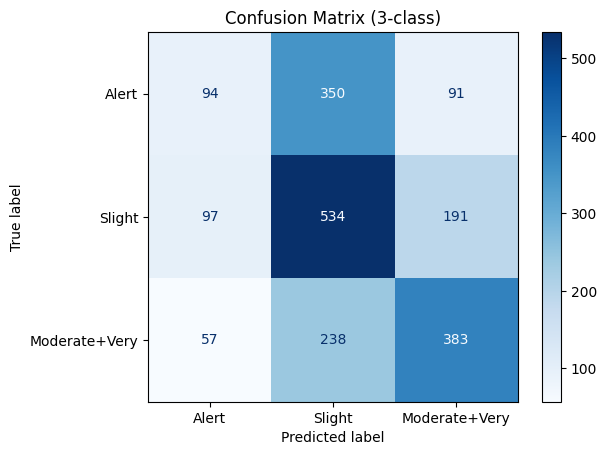


Summary Metrics:

   Metric Dummy
 Accuracy  0.50
  Wgt. F1  0.48
  Bal. F1  0.45
Precision  0.48
   Recall  0.50
      AUC  0.64


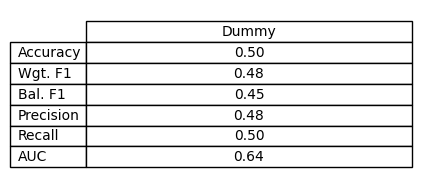

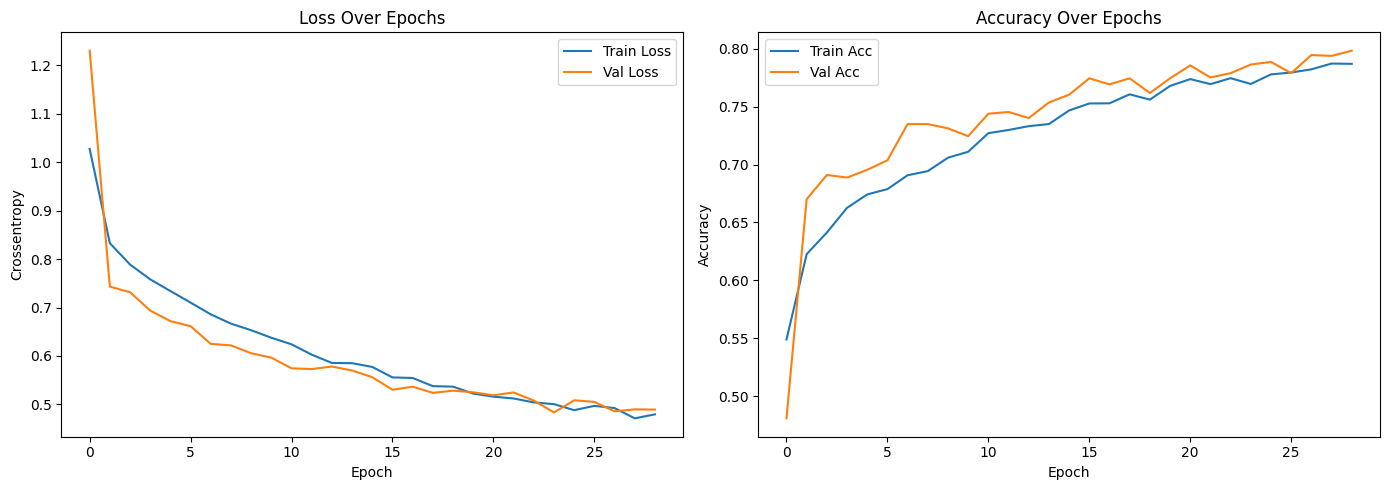

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# -----------------------------
# Load and preprocess data
# -----------------------------
train_path = "Classification_Combined_Data/S1_S2_train_data.csv"
test_path  = "Classification_Combined_Data/S1_S2_test_data.csv"

df = pd.read_csv(train_path)

# Drop 1back and 2back + missing labels
df = df[~df['Label'].isin(['1back', '2back'])].dropna(subset=['Label'])

# Multiclass mapping: Not Drowsy vs Slight vs Moderate+Very
label_map = {
    "Not Drowsy": 0,
    "Slight": 1,
    "Moderate": 2,
    "Very": 2
}
df = df[df['Label'].isin(label_map.keys())].copy()
df['y_mc'] = df['Label'].map(label_map).astype(int)

# Predictors and label
features = [
    'EAR_mean_mean','MAR_inner_mean','MAR_outer_mean','AU01_r_mean','AU15_r_mean','AU25_r_mean','AU26_r_mean','AU45_r_mean',
    'pose_Tx_mean','pose_Ty_mean','pose_Tz_mean','pose_Rx_mean','pose_Ry_mean','pose_Rz_mean',
    'gaze_angle_x_mean','gaze_angle_y_mean','swAngle_mean','laneDevPosition_mean','laneDev_OffsetfrmLaneCentre_mean','speed_mean',
    'EAR_mean_std','MAR_inner_std','MAR_outer_std','AU01_r_std','AU15_r_std','AU25_r_std','AU26_r_std','AU45_r_std',
    'pose_Tx_std','pose_Ty_std','pose_Tz_std','pose_Rx_std','pose_Ry_std','pose_Rz_std',
    'gaze_angle_x_std','gaze_angle_y_std','swAngle_std','laneDevPosition_std','laneDev_OffsetfrmLaneCentre_std','speed_std'
]
X = df[features]
y = df['y_mc'].values

# Scale and reshape
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_cnn = X_scaled.reshape(-1, X.shape[1], 1)

# -----------------------------
# Load test data (same preprocessing)
# -----------------------------
df_test = pd.read_csv(test_path)
df_test = df_test[~df_test['Label'].isin(['1back', '2back'])].dropna(subset=['Label'])
df_test = df_test[df_test['Label'].isin(label_map.keys())].copy()
df_test['y_mc'] = df_test['Label'].map(label_map).astype(int)

X_test_raw = df_test[features]
y_test = df_test['y_mc'].values
X_test_scaled = scaler.transform(X_test_raw)
X_test = X_test_scaled.reshape(-1, X_test_raw.shape[1], 1)

# Train/Val split (use stratify for multiclass)
X_train, X_val, y_train, y_val = train_test_split(
    X_cnn, y, test_size=0.15, stratify=y, random_state=42
)

# -----------------------------
# CNN Model (multiclass)
# -----------------------------
num_classes = 3

model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_cnn.shape[1], 1)),
    BatchNormalization(),

    Conv1D(64, kernel_size=2, activation='relu'),
    BatchNormalization(),

    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

# IMPORTANT: sparse_categorical_crossentropy expects integer labels 0..K-1
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# Train
# -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# -----------------------------
# Evaluate + confusion matrix
# -----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

probs = model.predict(X_test, verbose=0)               # shape (N, 3)
y_pred = np.argmax(probs, axis=1)

labels = ["Alert", "Slight", "Moderate+Very"]
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix (3-class)")
plt.show()

# -----------------------------
# Summary Metrics Table (multiclass, like screenshot)
# -----------------------------
acc = accuracy_score(y_test, y_pred)
wgt_f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
bal_f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)  # macro-F1

wgt_prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
wgt_rec  = recall_score(y_test, y_pred, average="weighted", zero_division=0)

# Multiclass AUC (one-vs-rest) if all classes appear in y_test
try:
    auc = roc_auc_score(y_test, probs, multi_class="ovr", average="weighted") if len(np.unique(y_test)) == num_classes else None
except ValueError:
    auc = None

metrics = ["Accuracy", "Wgt. F1", "Bal. F1", "Precision", "Recall", "AUC"]
vals = [
    f"{acc:.2f}",
    f"{wgt_f1:.2f}",
    f"{bal_f1:.2f}",
    f"{wgt_prec:.2f}",
    f"{wgt_rec:.2f}",
    f"{auc:.2f}" if auc is not None else "—"
]

col_name = "Dummy"  # rename if you want
summary_df = pd.DataFrame({ "Metric": metrics, col_name: vals })

print("\nSummary Metrics:\n")
print(summary_df.to_string(index=False))

# Optional: show as a matplotlib table
fig, ax = plt.subplots(figsize=(4.2, 2.2))
ax.axis("off")
tbl = ax.table(
    cellText=summary_df[[col_name]].values,
    rowLabels=summary_df["Metric"].values,
    colLabels=[col_name],
    cellLoc="center",
    loc="center"
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.25)
plt.show()

# -----------------------------
# Training curves
# -----------------------------
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Crossentropy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()